In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis
import warnings
warnings.filterwarnings('ignore')
#https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [3]:
data=pd.read_csv('breast_cancer_dataset.csv')

In [4]:
data.head() #unncessary labels=unnamed 32 and ıd for now.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [6]:
data.info() # There is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


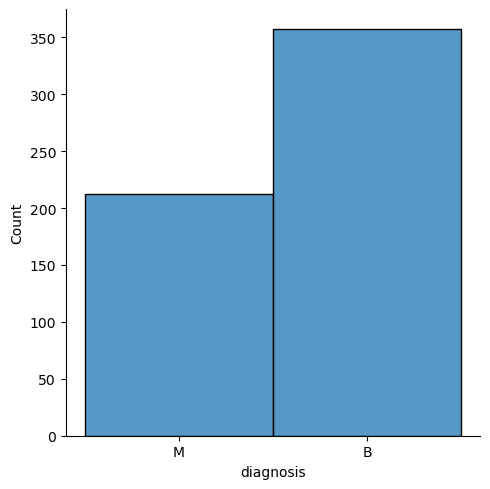

In [8]:
sns.displot(data['diagnosis'])

In [9]:
data['diagnosis']=[1 if i.strip()=='M' else 0 for i  in data['diagnosis']]

In [10]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
data.shape

(569, 31)

In [12]:
# EDA
corr_matrix=data.corr()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


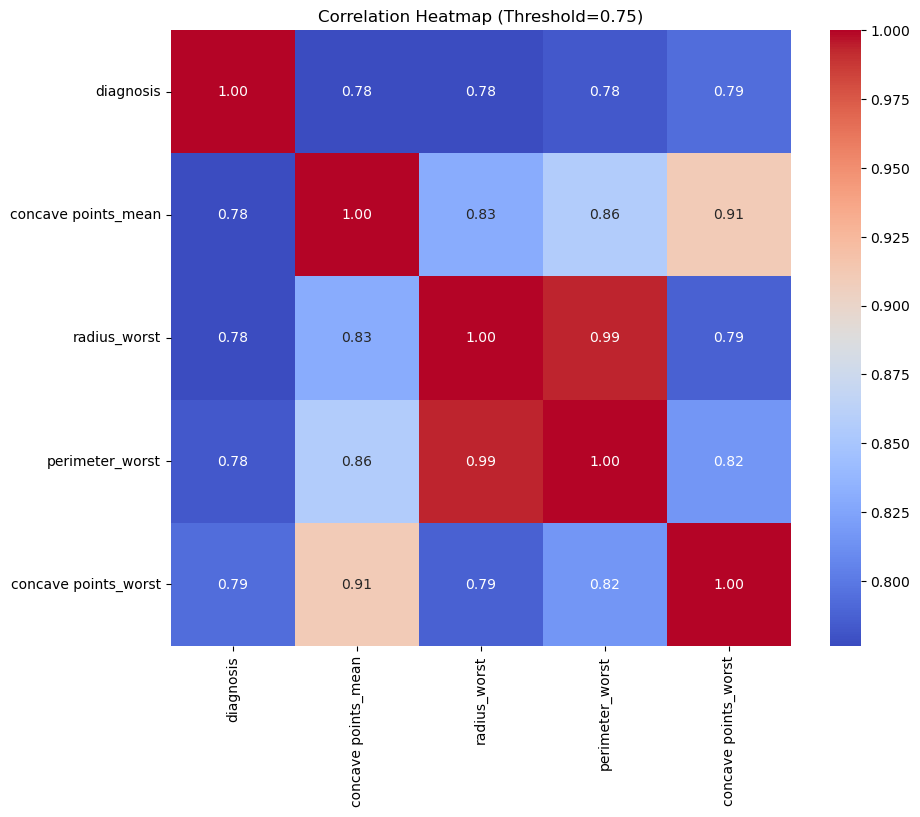

In [13]:
threshold=0.75
filter=np.abs(corr_matrix['diagnosis']) > threshold
corr_features=corr_matrix.columns[filter].to_list()
plt.figure(figsize=(10, 8))
sns.heatmap(data[corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap (Threshold={threshold})')
plt.show()


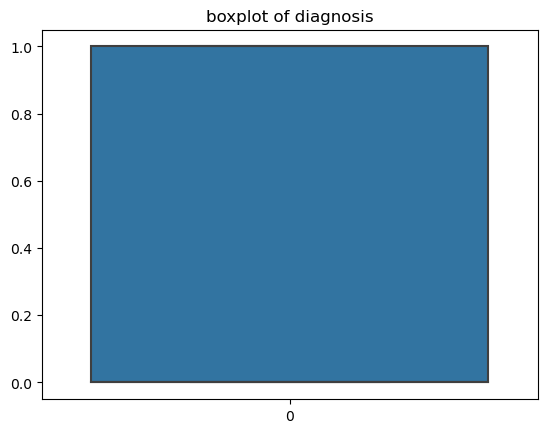

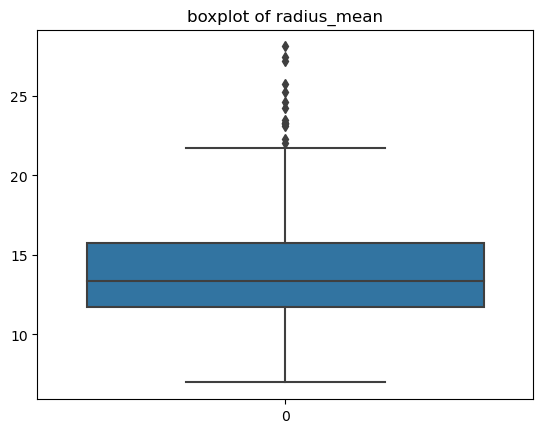

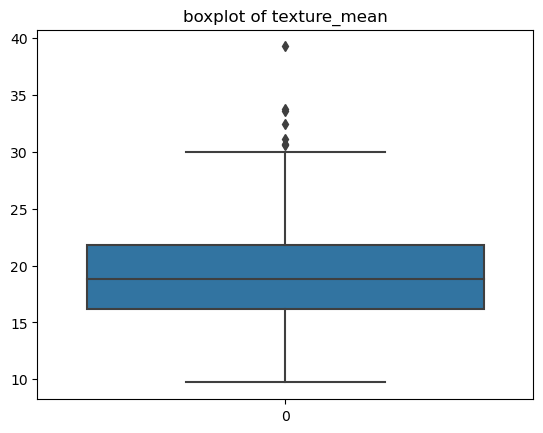

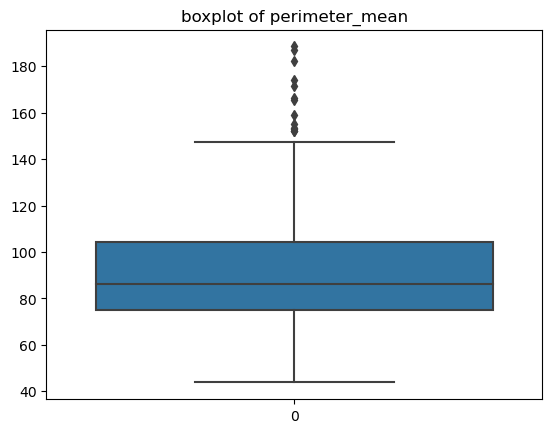

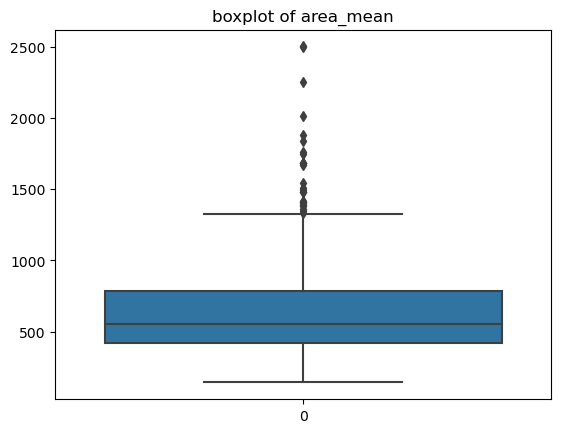

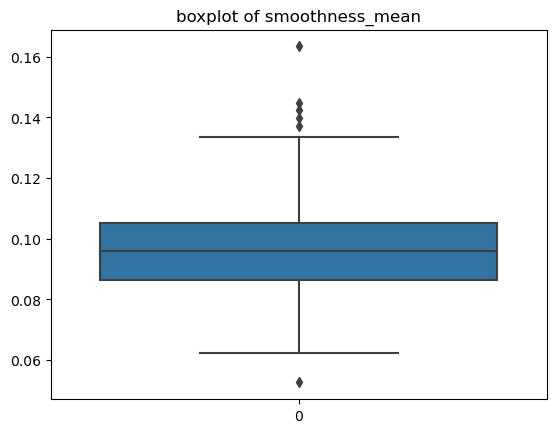

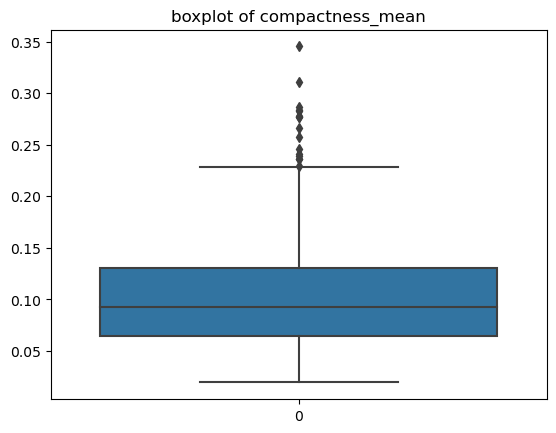

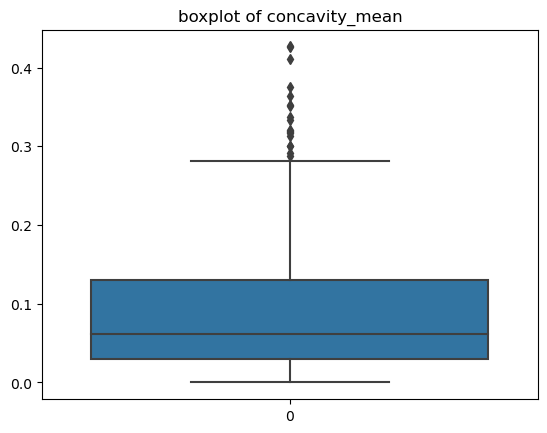

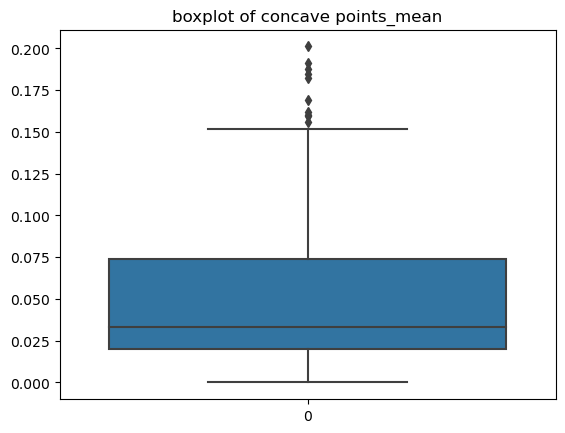

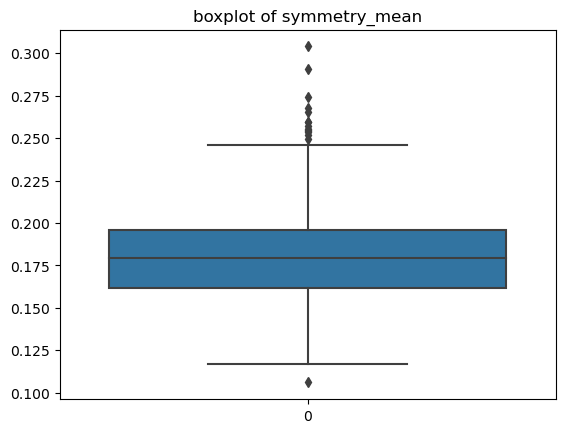

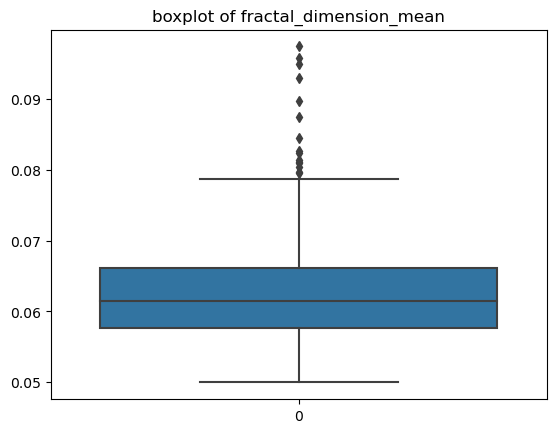

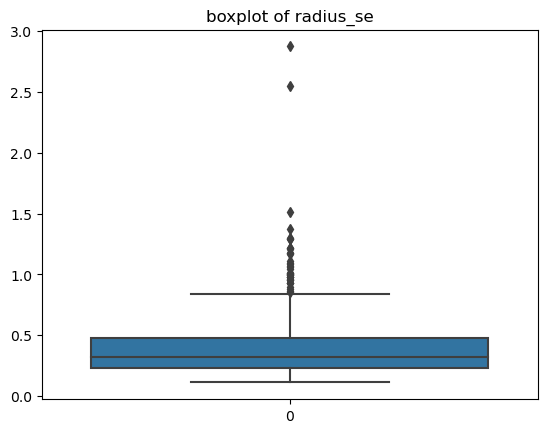

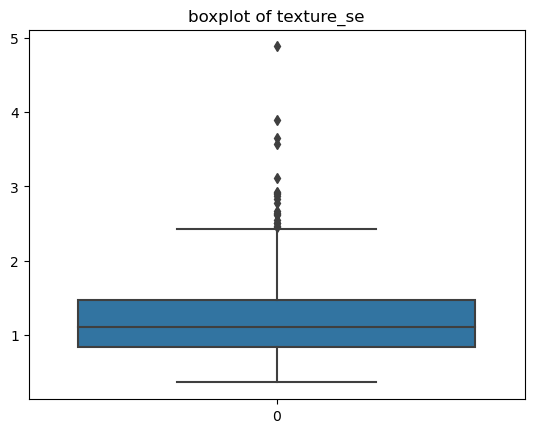

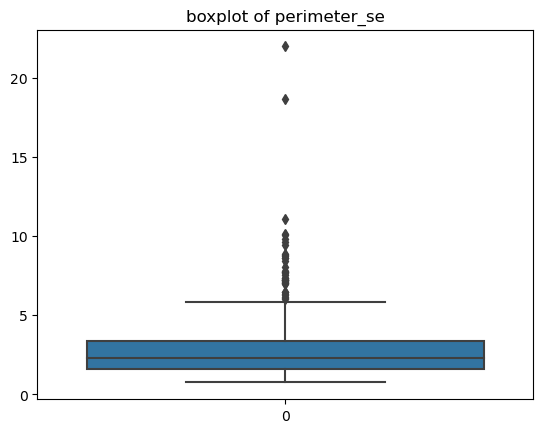

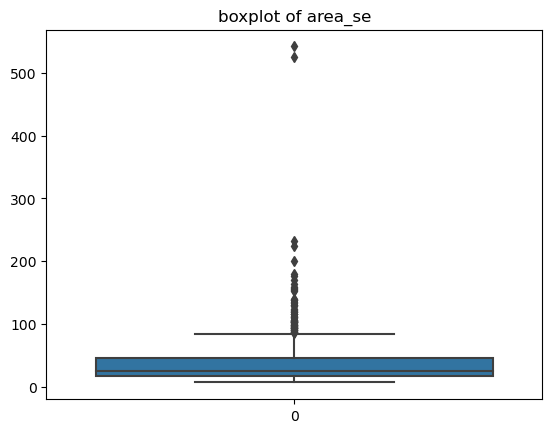

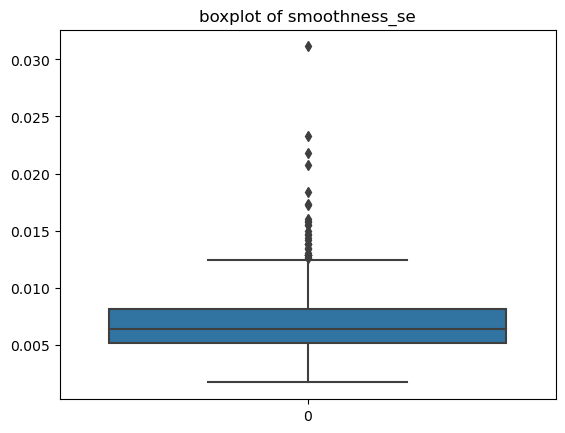

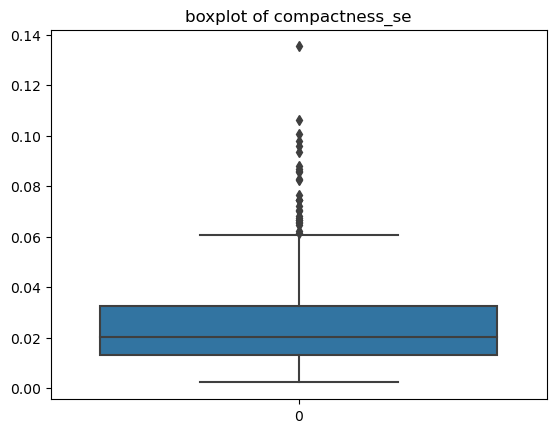

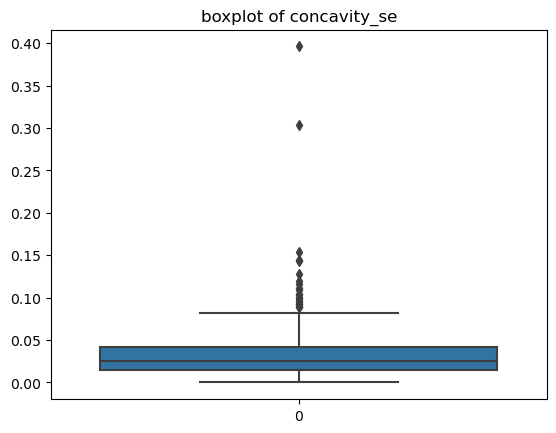

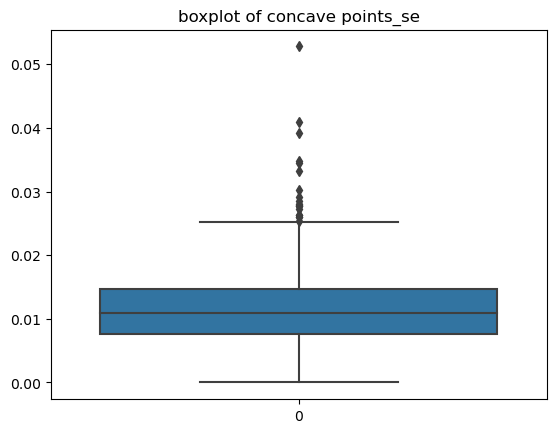

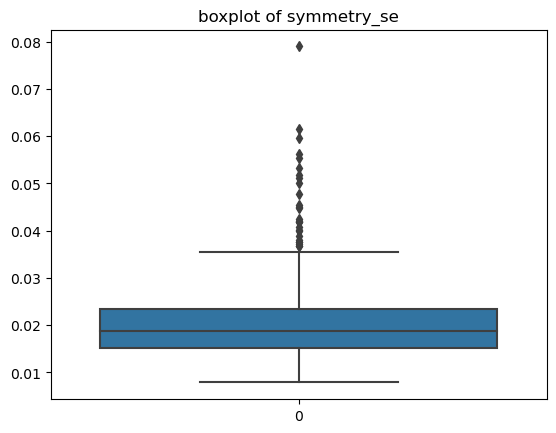

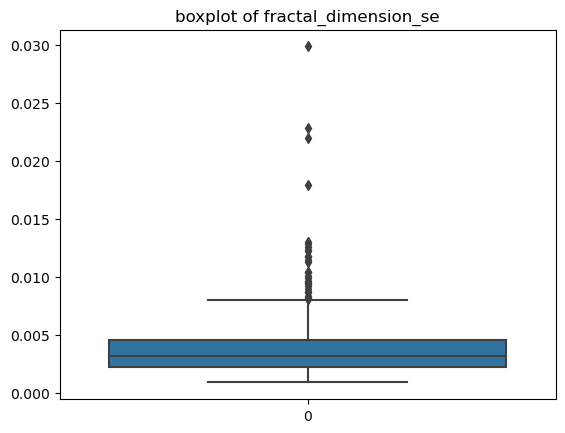

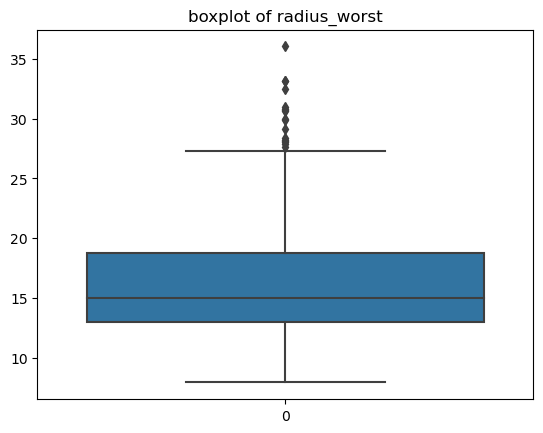

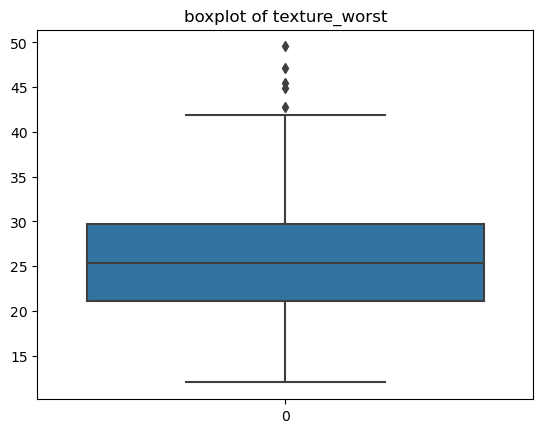

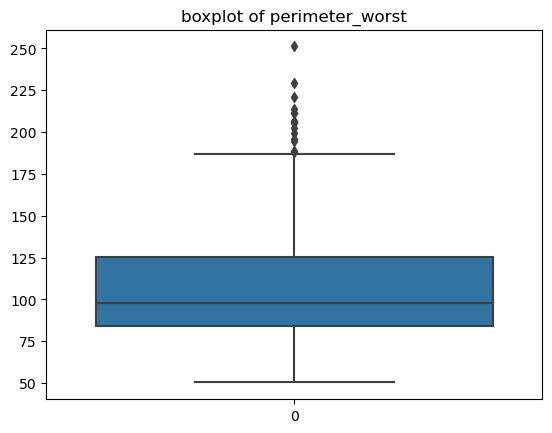

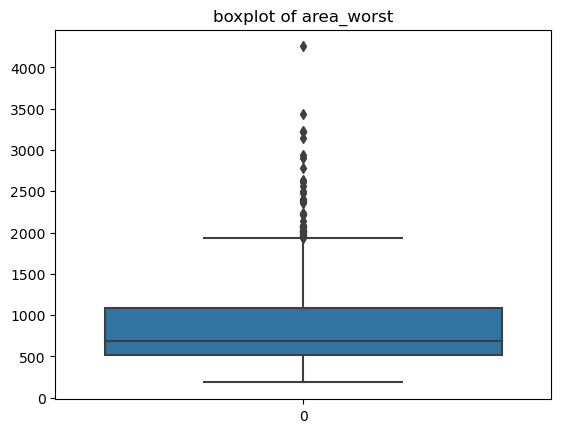

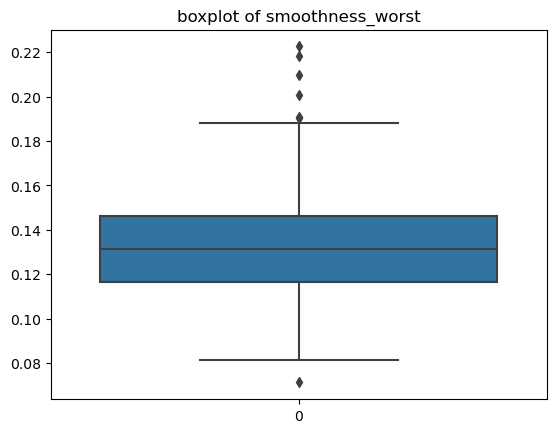

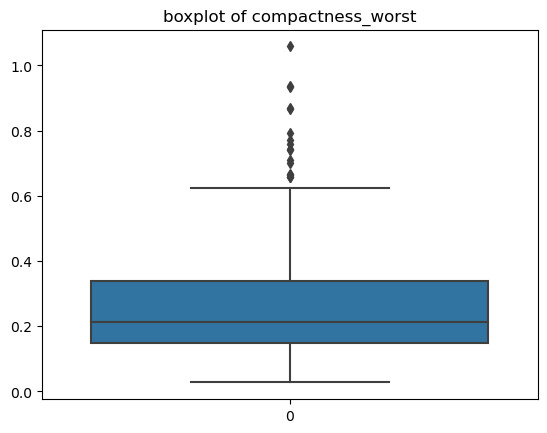

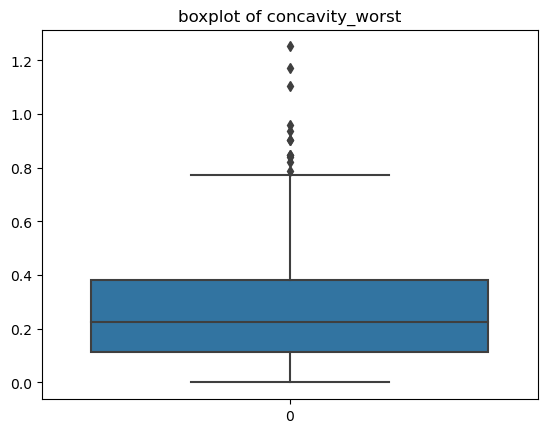

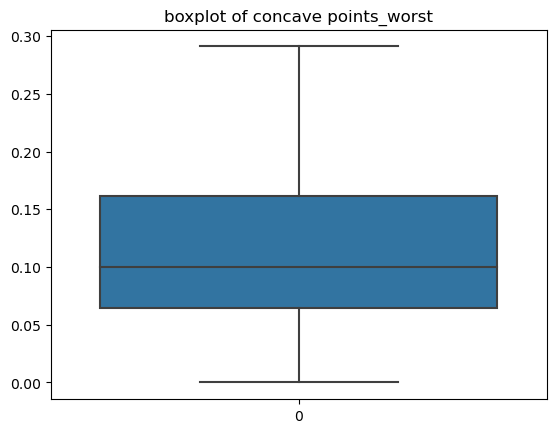

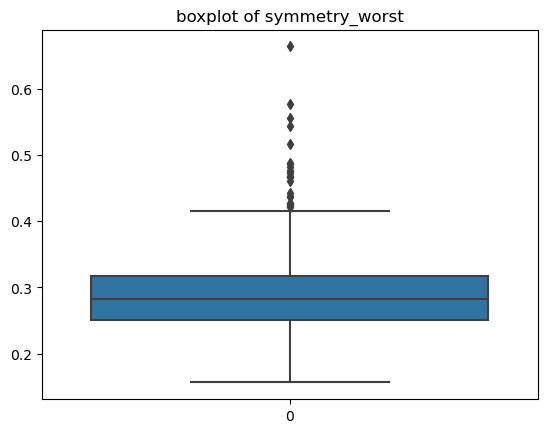

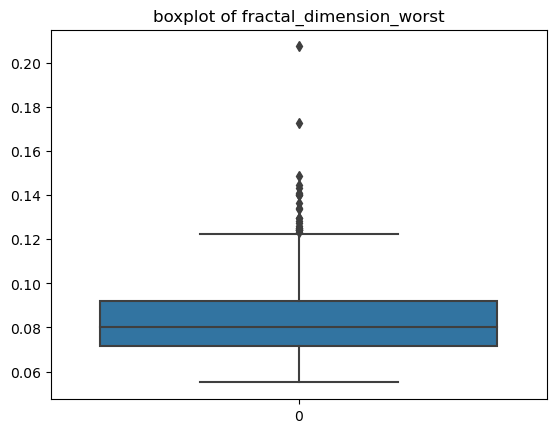

In [16]:
for x in data.columns:
    sns.boxplot(data[x])
    plt.title(f'boxplot of {x}')
    plt.show()

In [ ]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

data= data.apply(remove_outliers_iqr)
for column in data.columns:
    
    data.fillna(data[column].mean(),inplace=True)

In [ ]:

X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
standart=StandardScaler()
X_train=standart.fit_transform(X_train)
X_test=standart.transform(X_test)     #transform the X_test 
# Regularization 
alpha = 0.1  
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)


Ridge(alpha=0.1)

In [ ]:
#Knn method
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

cm=confusion_matrix(y_test,knn.predict(X_test))
acc=accuracy_score(y_test,knn.predict(X_test))

print(f'score is for test:{cm}')
print(f'Basic Knn acc for test: {acc}')


score is for test:[[106   2]
 [  5  58]]
Basic Knn acc for test: 0.9590643274853801


In [ ]:
# best params for knn
def KNN_best_param(X_train,X_test,y_train,y_test):
    global acc_test_knn
    k_numbers=list(range(1,30))
    weight_options=['uniform','distance']
    print()
    param_grid = dict(n_neighbors=k_numbers, weights=weight_options) #parameters should be in dictionary.
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
    grid.fit(X_train,y_train)
    print(f'Best training score: {grid.best_score_} with parameters {grid.best_params_}')
    knn=KNeighborsClassifier(**grid.best_params_)
    knn.fit(X_train,y_train)

    y_pred_test=knn.predict(X_test)
    y_pred_train=knn.predict(X_train)
    cm_test=confusion_matrix(y_test,y_pred_test)
    cm_train=confusion_matrix(y_train,y_pred_train)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test_knn=accuracy_score(y_test,y_pred_test)
    print(f'test score is:{cm_test} , train score is :{cm_train}')
    print()
    print(f'train accuracy is :{acc_train}, test aaccuracy is {acc_test_knn}')
    return grid


grid=KNN_best_param(X_train,X_test,y_train,y_test)







Best training score: 0.9597435897435898 with parameters {'n_neighbors': 6, 'weights': 'distance'}
test score is:[[106   2]
 [  4  59]] , train score is :[[249   0]
 [  0 149]]

train accuracy is :1.0, test aaccuracy is 0.9649122807017544


In [ ]:
from sklearn.svm import SVC

In [ ]:

from sklearn.metrics import classification_report,confusion_matrix
svm=SVC()
svm.fit(X_train,y_train)
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(svm,param_grid,verbose=3)
grid.fit(X_train,y_train)
y_pred_grid=grid.predict(X_test)
print(f'best score is : {grid.best_score_}')
print(f'best parameter is :{grid.best_params_}')



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.620 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.912 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.850 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.863 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.911 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.861 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.925 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

In [ ]:
print(classification_report(y_test,y_pred_grid))
print()
print()
print(confusion_matrix(y_test,y_pred_grid))
accuracy_svc=accuracy_score(y_test,y_pred_grid)
print(f"SVC accuracy is {accuracy_svc}")

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



[[105   3]
 [  4  59]]
SVC accuracy is 0.9590643274853801


In [ ]:

from sklearn.neighbors import NeighborhoodComponentsAnalysis


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=42)
nca.fit(X_train, y_train)

x_reduced_nca_train = nca.transform(X_train)
x_reduced_nca_test = nca.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(x_reduced_nca_train, y_train)

y_pred = knn.predict(x_reduced_nca_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
accuracy_nc=accuracy_score(y_test,y_pred)
print(f'accuracy score for Neighborhood is= {accuracy_nc}')

Confusion Matrix:
 [[70  1]
 [ 5 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

accuracy score for Neighborhood is= 0.9473684210526315


In [ ]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train,y_train),
y_pred=lr.predict(X_test)

print(f'confusion matrix is {confusion_matrix(y_test,y_pred)}')
print()
print(f'classification {classification_report(y_test,y_pred)}')
accuracy=accuracy_score(y_test,y_pred)
print(f"Logistic regression's  accuracy is {accuracy}")


confusion matrix is [[70  1]
 [12 31]]

classification               precision    recall  f1-score   support

           0       0.85      0.99      0.92        71
           1       0.97      0.72      0.83        43

    accuracy                           0.89       114
   macro avg       0.91      0.85      0.87       114
weighted avg       0.90      0.89      0.88       114

Logistic regression's  accuracy is 0.8859649122807017


In [ ]:

print(f'KNN(Gridsearch) accuracy score is is :{acc_test_knn}')
print(f'Basic Knn acc for test: {acc}') 
print(f"SVC accuracy is {accuracy_svc}")
print(f'accuracy score for Neighborhood is= {accuracy_nc}')
print(f"Logistic regression's  accuracy is {accuracy}")

KNN(Gridsearch) accuracy score is is :0.9649122807017544
Basic Knn acc for test: 0.9590643274853801
SVC accuracy is 0.9590643274853801
accuracy score for Neighborhood is= 0.9473684210526315
Logistic regression's  accuracy is 0.8859649122807017
